# Retrieving data from Digitial Earth Africa Repository using PyStac

In [53]:
from pystac_client import Client
from shapely.geometry import Point

In [90]:
api_url = "https://explorer.digitalearth.africa/stac/"

client = Client.open(api_url)

In [106]:
point = Point(36.8219, 1.2921) # Coordinates of Nairobi
search = client.search(
    collections=["rainfall_chirps_monthly"],
    intersects=point,
    datetime="2022/2024",
    max_items=12
)

In [107]:
print(search.matched())

# Items correspond to different days
items = search.item_collection()
print(len(items))

11
11


In [108]:
items.save_object("search.json")

In [109]:
for item in items:
    print(item.assets.keys())

dict_keys(['rainfall'])
dict_keys(['rainfall'])
dict_keys(['rainfall'])
dict_keys(['rainfall'])
dict_keys(['rainfall'])
dict_keys(['rainfall'])
dict_keys(['rainfall'])
dict_keys(['rainfall'])
dict_keys(['rainfall'])
dict_keys(['rainfall'])
dict_keys(['rainfall'])


In [110]:
rainfall_asset = items[0].assets['rainfall']
rainfall_asset.href

's3://deafrica-input-datasets/rainfall_chirps_monthly/chirps-v2.0_2022.01.tif'

In [96]:
import os
os.environ['AWS_NO_SIGN_REQUEST'] = 'True'
os.environ['AWS_S3_ENDPOINT'] = 's3.af-south-1.amazonaws.com'

In [97]:
import rioxarray
rainfall_ds = rioxarray.open_rasterio(rainfall_asset.href, masked=True)

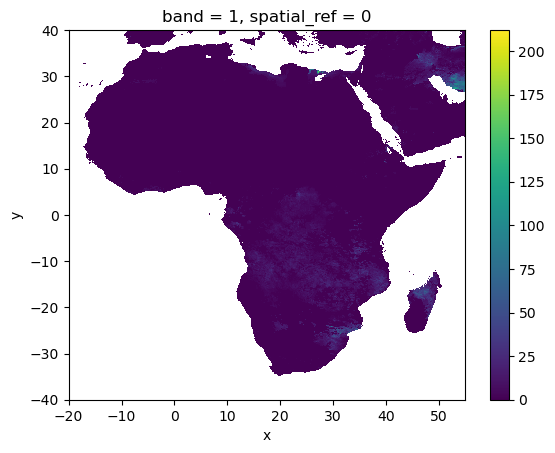

In [98]:
rainfall_ds.plot()